# Part 1: Using wget

In [0]:
# download the data from a URL
# source: https://archive.ics.uci.edu/ml/datasets/Arrhythmia
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

--2019-07-05 18:19:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K  1.52MB/s    in 0.3s    

2019-07-05 18:19:30 (1.52 MB/s) - ‘arrhythmia.data’ saved [402355/402355]



In [0]:
# list files in current directory
!ls

arrhythmia.data  sample_data


In [0]:
# check if the data has a header
!head arrhythmia.data

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

In [0]:
# check the data
import pandas as pd
df = pd.read_csv('arrhythmia.data', header=None)

In [0]:
# since the data has many columns, take just the first few and name them (as per the documentation)
data = df[[0,1,2,3,4,5]]
data.columns = ['age', 'sex', 'height', 'weight', 'QRS duration', 'P-R interval']

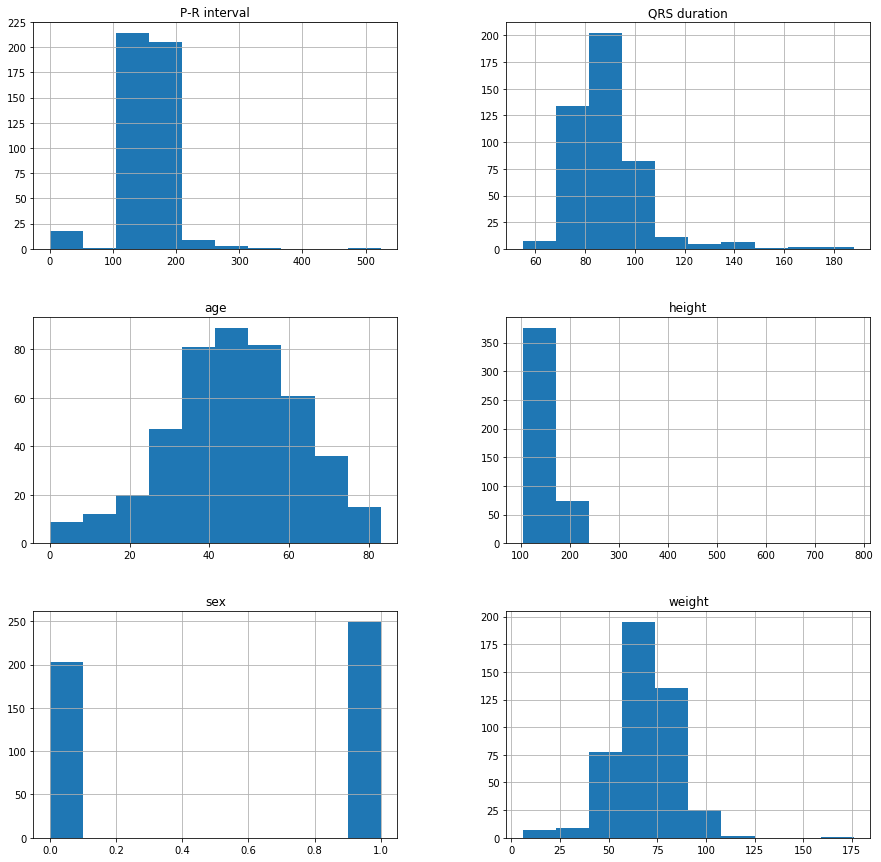

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] # make the plot bigger so the subplots don't overlap
data.hist(); # use a semicolon to supress return value

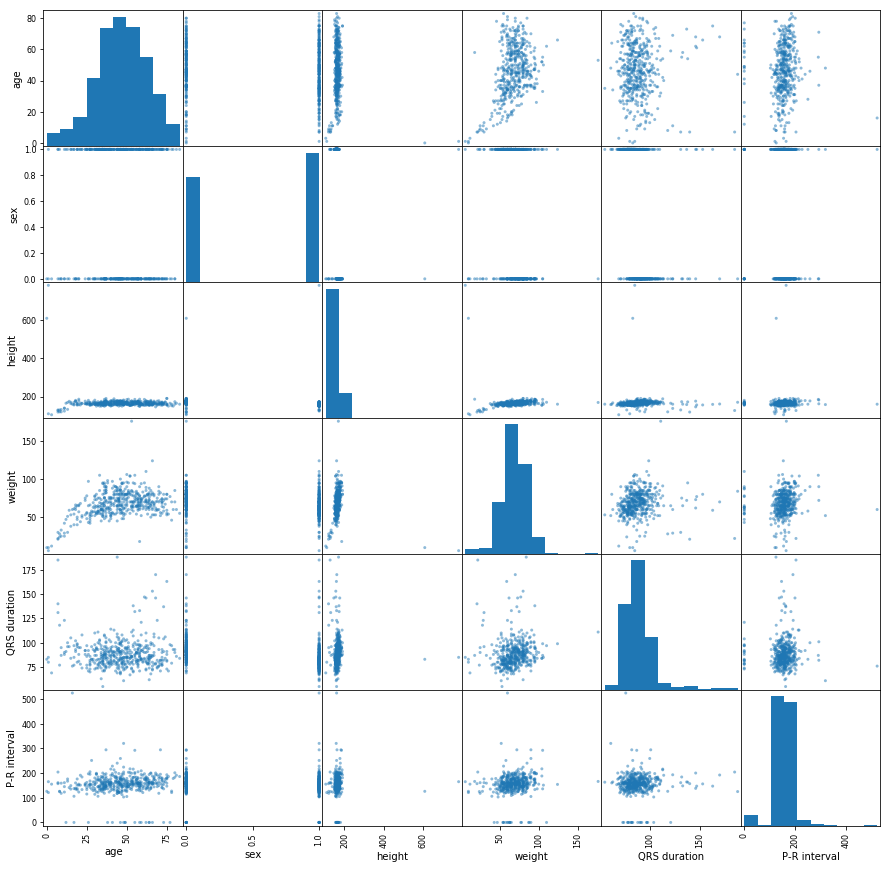

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(data);

# Part 2: Using tf.keras

In [0]:
# use keras get_file to download the auto MPG dataset
# source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'



In [0]:
# Install TensorFlow
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
# check out the documentation for other arguments
tf.keras.utils.get_file('auto-mpg.data', url)

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [0]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [0]:
# unless you specify an alternative path, the data will go into /root/.keras/datasets/
df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Part 3: Upload the file yourself

In [0]:
# another method: upload your own file
from google.colab import files
uploaded = files.upload()

Saving daily-minimum-temperatures-in-me.csv to daily-minimum-temperatures-in-me.csv


In [0]:
uploaded

{'daily-minimum-temperatures-in-me.csv': b'"Date","Daily minimum temperatures in Melbourne, Australia, 1981-1990"\r\n"1981-01-01",20.7\r\n"1981-01-02",17.9\r\n"1981-01-03",18.8\r\n"1981-01-04",14.6\r\n"1981-01-05",15.8\r\n"1981-01-06",15.8\r\n"1981-01-07",15.8\r\n"1981-01-08",17.4\r\n"1981-01-09",21.8\r\n"1981-01-10",20.0\r\n"1981-01-11",16.2\r\n"1981-01-12",13.3\r\n"1981-01-13",16.7\r\n"1981-01-14",21.5\r\n"1981-01-15",25.0\r\n"1981-01-16",20.7\r\n"1981-01-17",20.6\r\n"1981-01-18",24.8\r\n"1981-01-19",17.7\r\n"1981-01-20",15.5\r\n"1981-01-21",18.2\r\n"1981-01-22",12.1\r\n"1981-01-23",14.4\r\n"1981-01-24",16.0\r\n"1981-01-25",16.5\r\n"1981-01-26",18.7\r\n"1981-01-27",19.4\r\n"1981-01-28",17.2\r\n"1981-01-29",15.5\r\n"1981-01-30",15.1\r\n"1981-01-31",15.4\r\n"1981-02-01",15.3\r\n"1981-02-02",18.8\r\n"1981-02-03",21.9\r\n"1981-02-04",19.9\r\n"1981-02-05",16.6\r\n"1981-02-06",16.8\r\n"1981-02-07",14.6\r\n"1981-02-08",17.1\r\n"1981-02-09",25.0\r\n"1981-02-10",15.0\r\n"1981-02-11",13.7\r\n"

In [0]:
# file is uploaded to the current directory
!ls

arrhythmia.data  daily-minimum-temperatures-in-me.csv  sample_data


In [0]:
# open the file
# the last few lines are junk
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', error_bad_lines=False)
df.head()

b'Skipping line 3653: expected 2 fields, saw 3\n'


,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [0]:
# upload a Python file with some useful functions (meant for fake_util.py)
from google.colab import files
uploaded = files.upload()

Saving fake_util.py to fake_util.py


In [0]:
from fake_util import my_useful_function
my_useful_function()

hello world


In [0]:
!pwd

/content


# Part 4: Access files from Google Drive

In [0]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Check current directory - now gdrive is there
!ls

arrhythmia.data			      fake_util.py  __pycache__
daily-minimum-temperatures-in-me.csv  gdrive	    sample_data


In [0]:
# What's in gdrive?
!ls gdrive

'My Drive'


In [0]:
# Whoa! Look at all this great VIP content!
!ls '/content/gdrive/My Drive/'

 ANN-VIP		'NLP Feedback.gdoc'
 Appendix		 rain-princess-network.npz
 chunking.zip		'RL3 VIP'
 cnn2vip.zip		 starry-night-network.npz
 CV			 style-transfer-sample.zip
 dora-maar-network.npz	'Super VIP'
 estimator.zip		 SVM-VIP
 GAN			'SVM VIP Material.gdoc'
 gan.pdf		'SVM VIP Scratch Work.gdoc'
'Getting started.pdf'	'Temporary Folder'
 glove.6B.zip		'TF2.0 Notebooks'
 matlab2files.zip	 toxic_comment_train.csv.zip
 NLP3			 trees.zip
 nlp3vip.zip		 vae.pdf
